In [1]:
#importing the python libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data
df=pd.read_csv("/Users/malothubalram/Downloads/Student_scores.csv")

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
#information about the data in the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
#calculating the null values and droping them.
df.isnull().sum()
df=df.dropna()

In [6]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


In [7]:
#drop Unnamed column
df=df.drop("Unnamed: 0",axis=1)

In [8]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


In [9]:
#chahnge weekly study hours column
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head()


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


# Gender distribution

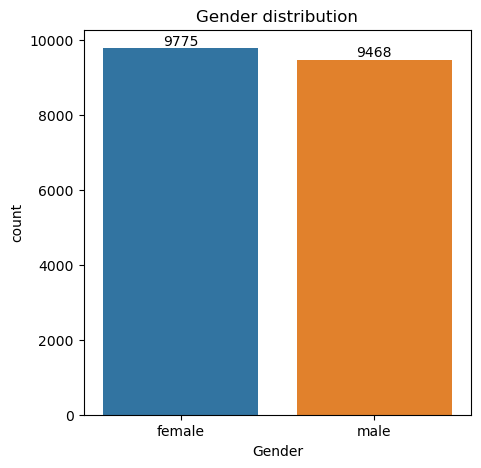

In [10]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x='Gender');
plt.title("Gender distribution")
for bars in ax.containers:
    ax.bar_label(bars)

From the above chart we have analysed that the no of females is more than no of males

In [11]:
gb=df.groupby('ParentEduc').agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})

In [12]:
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.541478,71.317685,70.551080
bachelor's degree,70.724379,73.560401,73.873964
high school,64.294461,67.284124,65.495892
master's degree,72.293680,75.922677,76.423792
some college,66.578305,69.300113,68.651525
some high school,62.522417,65.438218,63.572171


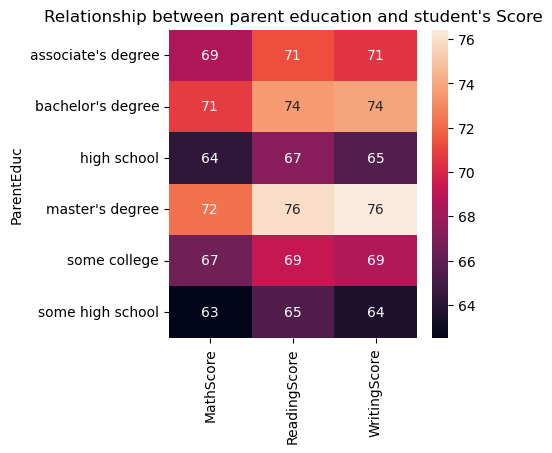

In [13]:
plt.figure(figsize=(4,4))
sns.heatmap(gb,annot=True);
plt.title("Relationship between parent education and student's Score")
plt.show()


From the above chart  we have concluded that the education of parent have good impact on their scores .

# Marital Status

In [14]:
gb1=df.groupby('ParentMaritalStatus').agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.730344,69.816339,68.954545
married,66.705241,69.474248,68.488509
single,66.285590,69.388021,68.543403
widowed,68.083784,70.662162,69.651351


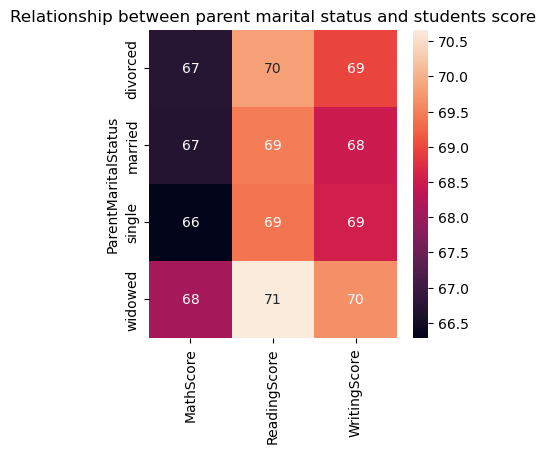

In [15]:
plt.figure(figsize=(4,4))
plt.title("Relationship between parent marital status and students score")
sns.heatmap(gb1,annot=True);


From the above chart we have concluded that no/negligible impact on the student score

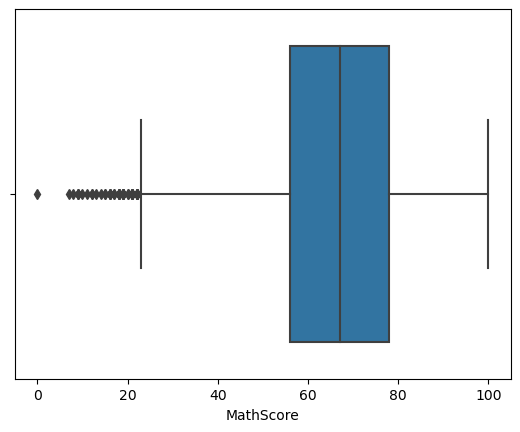

In [16]:
sns.boxplot(data=df,x="MathScore");

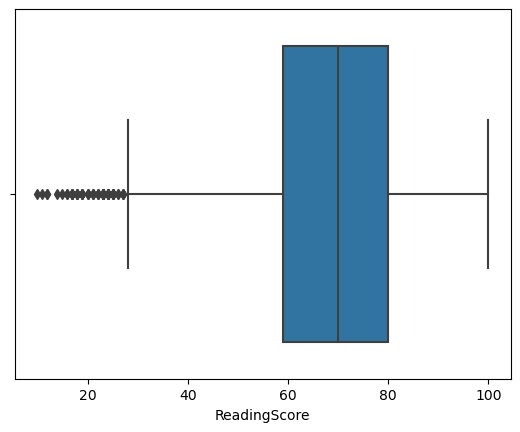

In [17]:
sns.boxplot(data=df,x="ReadingScore");

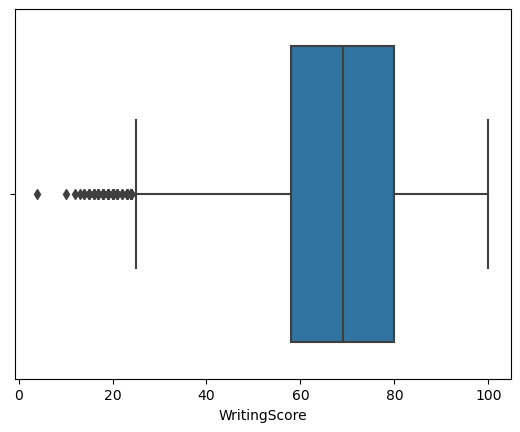

In [18]:
sns.boxplot(data=df,x="WritingScore");

In [19]:
print(df["EthnicGroup"].unique())

['group B' 'group C' 'group D' 'group A' 'group E']


# Distribution of Ethnic Group

[1465, 3915, 6181, 4970, 2712]


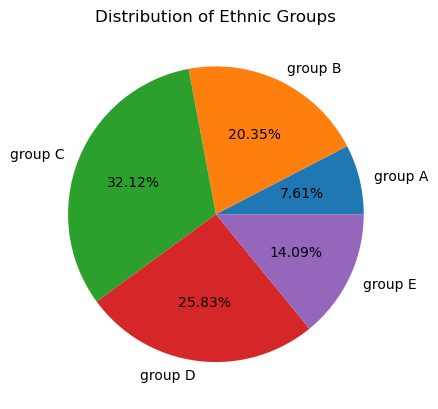

In [20]:
groupA=df.loc[(df['EthnicGroup']=="group A")].count()
groupB=df.loc[(df['EthnicGroup']=="group B")].count()
groupC=df.loc[(df['EthnicGroup']=="group C")].count()
groupD=df.loc[(df['EthnicGroup']=="group D")].count()
groupE=df.loc[(df['EthnicGroup']=="group E")].count()

l=["group A","group B","group C","group D","group E"]
mylst=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
print(mylst)
plt.pie(mylst,labels=l,autopct="%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()
    

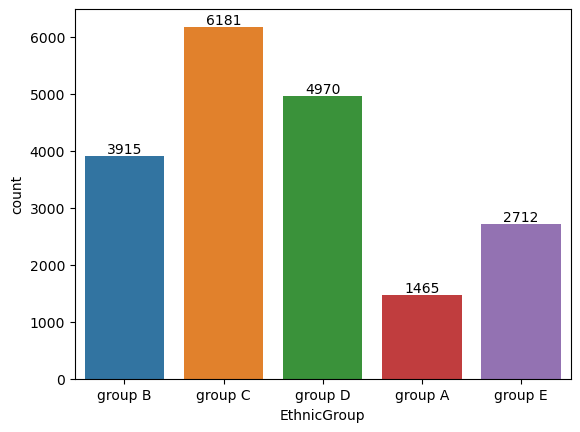

In [21]:
ax=sns.countplot(data=df,x='EthnicGroup')
for bars in ax.containers:
    ax.bar_label(bars)